### 4. Recursive SMARTS(추가)

In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [6]:
mol1 = Chem.MolFromSmiles('c1ccccc1')
mol2 = Chem.MolFromSmiles('o1cccc1')
mol3 = Chem.MolFromSmiles('C1CCCCC1')

my_mol = [mol1,
          mol2,
          mol3
         ]

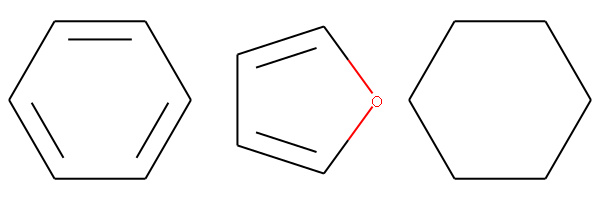

In [7]:
Draw.MolsToGridImage(my_mol, useSVG=False)

In [9]:
mol4 = Chem.MolFromSmiles('c1c(O)c(N)ccc1')
mol5 = Chem.MolFromSmiles('c1c(O)cc(N)cc1')
mol6 = Chem.MolFromSmiles('c1c(O)ccc(N)c1')

ex_mol = [mol4,
          mol5,
          mol6
         ]

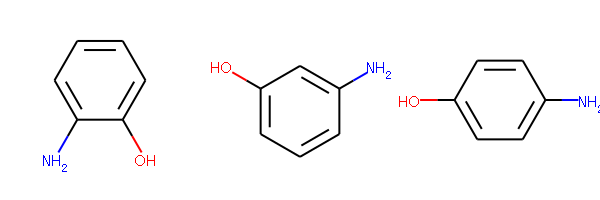

In [10]:
Draw.MolsToGridImage(ex_mol, useSVG=False)

![orth,meta,para](https://s11452.pcdn.co/wp-content/uploads/2018/01/3-ortho-para-1-e1516917639506.png)

In [15]:
no1 = Chem.MolFromSmarts('CaaO')    
[mol.HasSubstructMatch(no1) for mol in my_mol]

[False, False, False]

In [16]:
no1 = Chem.MolFromSmarts('CaaO')  
[mol.HasSubstructMatch(no1) for mol in ex_mol]

[False, False, False]

In [17]:
no2 = Chem.MolFromSmarts('caaO')
[mol.HasSubstructMatch(no2) for mol in my_mol]

[False, False, False]

In [18]:
no2 = Chem.MolFromSmarts('caaO')
[mol.HasSubstructMatch(no2) for mol in ex_mol]

[True, True, True]

In [21]:
no3 = Chem.MolFromSmarts('NaaO')
[mol.HasSubstructMatch(no3) for mol in my_mol]

[False, False, False]

In [22]:
no3 = Chem.MolFromSmarts('NaaO')
[mol.HasSubstructMatch(no3) for mol in ex_mol]

[True, False, False]

In [23]:
no4 = Chem.MolFromSmarts('CaaaN')
[mol.HasSubstructMatch(no4) for mol in my_mol]

[False, False, False]

In [24]:
no4 = Chem.MolFromSmarts('CaaaN')
[mol.HasSubstructMatch(no4) for mol in ex_mol]

[False, False, False]

In [25]:
no5 = Chem.MolFromSmarts('caaaN')
[mol.HasSubstructMatch(no5) for mol in my_mol]

[False, False, False]

In [26]:
no5 = Chem.MolFromSmarts('caaaN')
[mol.HasSubstructMatch(no5) for mol in ex_mol]

[True, True, True]

* 한 가지의 기준 원소를 기준으로 ortho-, meta-, para-를 표현
* aromatic c의 경우 고리가 'c'로 구성되므로 어디를 기준으로 해도 True 출력

### 6. Reaction Queries

* A reaction query는 reactant, agent, product로 구성되며, 각 성분은 ">"문자로 구분된다.

Query | Target | Matches
---------|-------|----------
`C>>` | CC>>CN | 2
`>C>` | CC>>CN | 0
`>>C` | CC>>CN | 1
`C` | CC>>CN | 3

### Reaction Atom Maps

> `Atom Map`은 컴퓨터가 반응물과 생성물사이의 같은 원자임을 알 수 있게 명확하게 표현해주는 방법이다.

* 원하는 원자의 뒤에 `:`와 숫자를 이용해 표시한다. ( `[CH3:2]` 는 `H`를 3개 가지고 있는 탄소에 2번을 부여함을 의미한다.  )
* 부여한 숫자는 추가적인 성질을 나타내지 않는다. 단지 구분짓기 위함이다. ( 단, 모든 원자에 같은 숫자를 부여할 경우는 제외. )

### Atom Map은 유일하거나 완전하지 않다.

1. 반응이 일어날 때, 분자에 결합을 표현하는데 한계가 있다. <br>
2. 반응매커니즘이 애매할 때 <br>
예를들어, ![secondcase](http://www.daylight.com/dayhtml/doc/theory/cope.gif) <br>
이 경우 실제로는 두가지의 다른 반응 매커니즘이 있지만,  `[CH2:1]=[CH:2][CH2:1][CH2:3][C:4](C)[CH2:3]`으로 표현해준다.
3. 반응에 대한 정보가 부족한 경우. <br>
확실한 정보에 대해서 부분적으로만 `Mapping`한다. 절대로 모르는 반응에 입력하려하면 안 된다.<br>
`Atom Map`은 `unique SMILES`에서 나타나지않는다. <br>
4. `Atom Map`은 어떤 의미도 가지지않는 숫자일 뿐이다.

* **The atom mapping for a reaction query is optional**. When included in the definition of the pattern, **it is used for searching**.
* Each of the hits is examined **to make sure the atom map classes match on the reactant and product sides of the reaction.**
* An atom map is a property which must be evaluated on a global scope during the match.
* In SMARTS, the atom map has unusual semantics.
* **One can not know if the map is correct without considering every atom in the match, in effect requiring the enumeration of every possible path before testing.** 
* **This is much more computationally expensive than the current SMARTS implementation**
* **The expressiveness of SMARTS for atom maps has been limited to a low-precedence and operation.**
* That is, only expressions of form: **"`[expr:n]`" or "`[expr:?n]`" are allowed**, where "expr" is any legal atomic expression excluding atom maps and "n" is a map class value.

Query: | Target: | Matches: | Comment:
---- | ---- | ---- | -----
C>>C | CC>>CC | 4 | No maps, normal match.
C>>C | `[CH3:7][CH3:8]>> [CH3:7][CH3:8]` | 4 | No maps in query, maps in target are ignored.
`[C:1]>>C` | `[CH3:7][CH3:8]>> [CH3:7][CH3:8]` | 4 | Unpaired map in query ignored.
`[C:1]>>[C:1]` | CC>>CC | 0 | No maps in target, hence no matches.
`[C:?1]>>[C:?1]` | CC>>CC | 4 | Query says mapped as shown or not present.
`[C:1]>>[C:1]` | `[CH3:7][CH3:8]>>[CH3:7][CH3:8]` | 2 | Matches for target 7,7 and 8,8 atom pairs.
`[C:1]>>[C:2]` | `[CH3:7][CH3:8]>> [CH3:7][CH3:8]` | 4 | When a query class is not found on both sides of the query, it is ignored; this query does NOT say that the atoms are in different classes.
`[C:1][C:1]>>[C:1]` | `[CH3:7][CH3:7]>> [CH3:7][CH3:7]` | 4 | Atom maps match with "or" logic. All atoms get bound to class 7.
`[C:1][C:1]>>[C:1]` | `[CH3:7][CH3:8]>> [CH3:7][CH3:8]` | 4 | The reactant atoms are bound to classes 7 and 8. Note that having the first query atom bound to class 7 does not preclude binding the second atom. Next, the product atom can bind to classes 7 or 8.
`[C:1][C:1]>>[C:1]` | `[CH3:7][CH3:7]>> [CH3:7][CH3:8]` | 2 | The reactants are bound to class 7. The product atom can bind to class 7 only.

#### Chemical Reaction Handling
Chemical Reaction is derived from SMARTS
* reaction  ::=   reactants ">>" products
* reactants ::=  molecules
* products  ::=   molecules

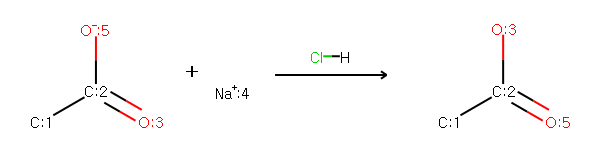

In [59]:
rxn = AllChem.ReactionFromSmarts('[CH3:1]-[C:2](=[O:3])-[O-:5].[Na+:4]>[H]-Cl>[CH3:1]-[C:2](=[O:5])-[OH:3]')
rxn

In [60]:
rxn.GetNumProductTemplates()

1

In [61]:
rxn.GetNumReactantTemplates()

2

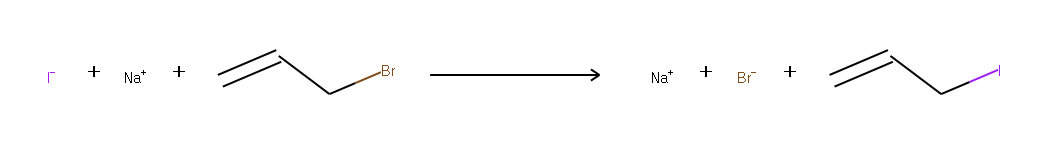

In [64]:
rxn = AllChem.ReactionFromSmarts('[I-].[Na+].C=C-C-Br >> [Na+].[Br-].C=C-C-I ')
rxn

In [65]:
rxn.GetNumProductTemplates()

3

In [66]:
rxn.GetNumReactantTemplates()

3